### Skrypt analizujący pliki CSV z danymi przedsiębiorstw w stanie upadłości, likwidacji, zawieszeniu

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
pd.set_option('display.max_colwidth',100)

In [25]:
#wczytanie danych
kody=pd.read_csv('PKD.csv')
zaw=pd.read_csv('zawieszenia.csv')
lik=pd.read_csv('likwidacje.csv')
upa=pd.read_csv('upadlosci.csv')

In [30]:
kody.head()

,kod,opis
0,01.11.Z,"Uprawa zbóż, roślin strączkowych i roślin oleistych na nasiona, z wyłączeniem ryżu"
1,01.12.Z,Uprawa ryżu
2,01.13.Z,"Uprawa warzyw, włączając melony oraz uprawa roślin korzeniowych i roślin bulwiastych"
3,01.14.Z,Uprawa trzciny cukrowej
4,01.15.Z,Uprawa tytoniu


In [31]:
zaw.head()

,nazwa,miasto,branza,kod
0,"MASARNIA ""DUET"" E.KAŁUŻNY, K.KAŁUŻNA SPÓŁKA JAWNA",Niechcice,"Produkcja mięsa, z wyjątkiem drobiowego i króliczego","['15', '11', 'Z']"
1,"MASARNIA ""DUET"" E.KAŁUŻNY, K.KAŁUŻNA SPÓŁKA JAWNA",Niechcice,"Produkcja konserw, przetworów z mięsa, z podrobów mięsnych i z krwi","['15', '13', 'A']"
2,"MASARNIA ""DUET"" E.KAŁUŻNY, K.KAŁUŻNA SPÓŁKA JAWNA",Niechcice,Sprzedaż hurtowa mięsa i wyrobów mięsnych,"['51', '32', 'Z']"
3,"MASARNIA ""DUET"" E.KAŁUŻNY, K.KAŁUŻNA SPÓŁKA JAWNA",Niechcice,Sprzedaż detaliczna mięsa i wyrobów mięsnych,"['52', '22', 'Z']"
4,"MASARNIA ""DUET"" E.KAŁUŻNY, K.KAŁUŻNA SPÓŁKA JAWNA",Niechcice,"Sprzedaż detaliczna w nie wyspecjalizowanych sklepach z przewagą żywności, napojów i wyrobów tyt...","['52', '11', 'Z']"


In [32]:
lik.head()

,nazwa,miasto,branza,kod
0,"PRZEDSIĘBIORSTWO WIELOBRANŻOWE ""TELSTEN"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W LIKWIDACJI",Bydgoszcz,Produkcja komputerów i innych urządzeń do przetwarzania informacji,"['30', '02', 'Z']"
1,"PRZEDSIĘBIORSTWO WIELOBRANŻOWE ""TELSTEN"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W LIKWIDACJI",Bydgoszcz,"Działalność usługowa w zakresie instalowania, naprawy, konserwacji i przezwajania silników elekt...","['31', '10', 'B']"
2,"PRZEDSIĘBIORSTWO WIELOBRANŻOWE ""TELSTEN"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W LIKWIDACJI",Bydgoszcz,"Działalność usługowa w zakresie instalowania, naprawy, konserwacji nadajników telewizyjnych i ra...","['32', '20', 'B']"
3,"PRZEDSIĘBIORSTWO WIELOBRANŻOWE ""TELSTEN"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W LIKWIDACJI",Bydgoszcz,"Działalność usługowa w zakresie instalowania, naprawy i konserwacji profesjonalnego sprzętu radi...","['32', '30', 'B']"
4,"PRZEDSIĘBIORSTWO WIELOBRANŻOWE ""TELSTEN"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W LIKWIDACJI",Bydgoszcz,"Wykonywanie robót ogólnobudowlanych w zakresie rozdzielczych obiektów liniowych: rurociągów, lin...","['45', '21', 'D']"


In [33]:
upa.head()

,nazwa,miasto,branza,kod
0,"""FORESTEL"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W UPADŁOŚCI",Kielce,Naprawa i konserwacja urządzeń elektronicznych i optycznych,"['33', '13', 'Z']"
1,"""FORESTEL"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W UPADŁOŚCI",Kielce,"Wykonywanie instalacji wodno-kanalizacyjnych, cieplnych, gazowych i klimatyzacyjnych","['43', '22', 'Z']"
2,"""FORESTEL"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W UPADŁOŚCI",Kielce,Wykonywanie pozostałych instalacji budowlanych,"['43', '29', 'Z']"
3,"""FORESTEL"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W UPADŁOŚCI",Kielce,Wykonywanie pozostałych robót budowlanych wykończeniowych,"['43', '39', 'Z']"
4,"""FORESTEL"" SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ W UPADŁOŚCI",Kielce,Sprzedaż hurtowa sprzętu elektronicznego i telekomunikacyjnego oraz części do niego,"['46', '52', 'Z']"


In [34]:
#edycja kolumny z kodem PKD
zaw['PKD']=zaw['kod'].str.replace("'","").str.replace("[","").str.replace("]","").str.replace("\s","").str.replace(",",".")
lik['PKD']=lik['kod'].str.replace("'","").str.replace("[","").str.replace("]","").str.replace("\s","").str.replace(",",".")
upa['PKD']=upa['kod'].str.replace("'","").str.replace("[","").str.replace("]","").str.replace("\s","").str.replace(",",".")

In [35]:
#stworzenie tabel z liczbą kodów PKD dla poszczególnych stanów 
kody_zliczone_zaw = zaw['PKD'].value_counts().rename_axis('kod').reset_index(name='liczba')
kody_zliczone_upa = upa['PKD'].value_counts().rename_axis('kod').reset_index(name='liczba')
kody_zliczone_lik = lik['PKD'].value_counts().rename_axis('kod').reset_index(name='liczba')

In [36]:
kody_zliczone_zaw.head()

,kod,liczba
0,70.22.Z,424
1,68.20.Z,421
2,49.41.Z,327
3,68.10.Z,319
4,46.None.None,316


In [37]:
#lewostronne złączenie poszczególnych tabel ze zliczonymi kodami z tabelą z objaśnieniem kodów
podsumowanie_lik=pd.merge(kody_zliczone_lik,kody,how='left',on='kod')
podsumowanie_zaw=pd.merge(kody_zliczone_zaw,kody,how='left',on='kod')
podsumowanie_upa=pd.merge(kody_zliczone_upa,kody,how='left',on='kod')

In [38]:
podsumowanie_zaw.head(5)

,kod,liczba,opis
0,70.22.Z,424,Pozostałe doradztwo w zakresie prowadzenia działalności gospodarczej i zarządzania
1,68.20.Z,421,Wynajem i zarządzanie nieruchomościami własnymi lub dzierżawionymi
2,49.41.Z,327,Transport drogowy towarów
3,68.10.Z,319,Kupno i sprzedaż nieruchomości na własny rachunek
4,46.None.None,316,NaN


In [39]:
podsumowanie_lik.head(5)

,kod,liczba,opis
0,68.20.Z,372,Wynajem i zarządzanie nieruchomościami własnymi lub dzierżawionymi
1,70.22.Z,351,Pozostałe doradztwo w zakresie prowadzenia działalności gospodarczej i zarządzania
2,68.10.Z,261,Kupno i sprzedaż nieruchomości na własny rachunek
3,49.41.Z,236,Transport drogowy towarów
4,41.20.Z,208,Roboty budowlane związane ze wznoszeniem budynków mieszkalnych i niemieszkalnych


In [40]:
podsumowanie_upa.head(5)

,kod,liczba,opis
0,68.20.Z,202,Wynajem i zarządzanie nieruchomościami własnymi lub dzierżawionymi
1,49.41.Z,188,Transport drogowy towarów
2,41.20.Z,143,Roboty budowlane związane ze wznoszeniem budynków mieszkalnych i niemieszkalnych
3,43.99.Z,139,"Pozostałe specjalistyczne roboty budowlane, gdzie indziej niesklasyfikowane"
4,68.10.Z,128,Kupno i sprzedaż nieruchomości na własny rachunek


## Graficzne przedstawienie 5 branż, które najbardziej ucierpiały, dla poszczególnych stanów przedsiębiorstw

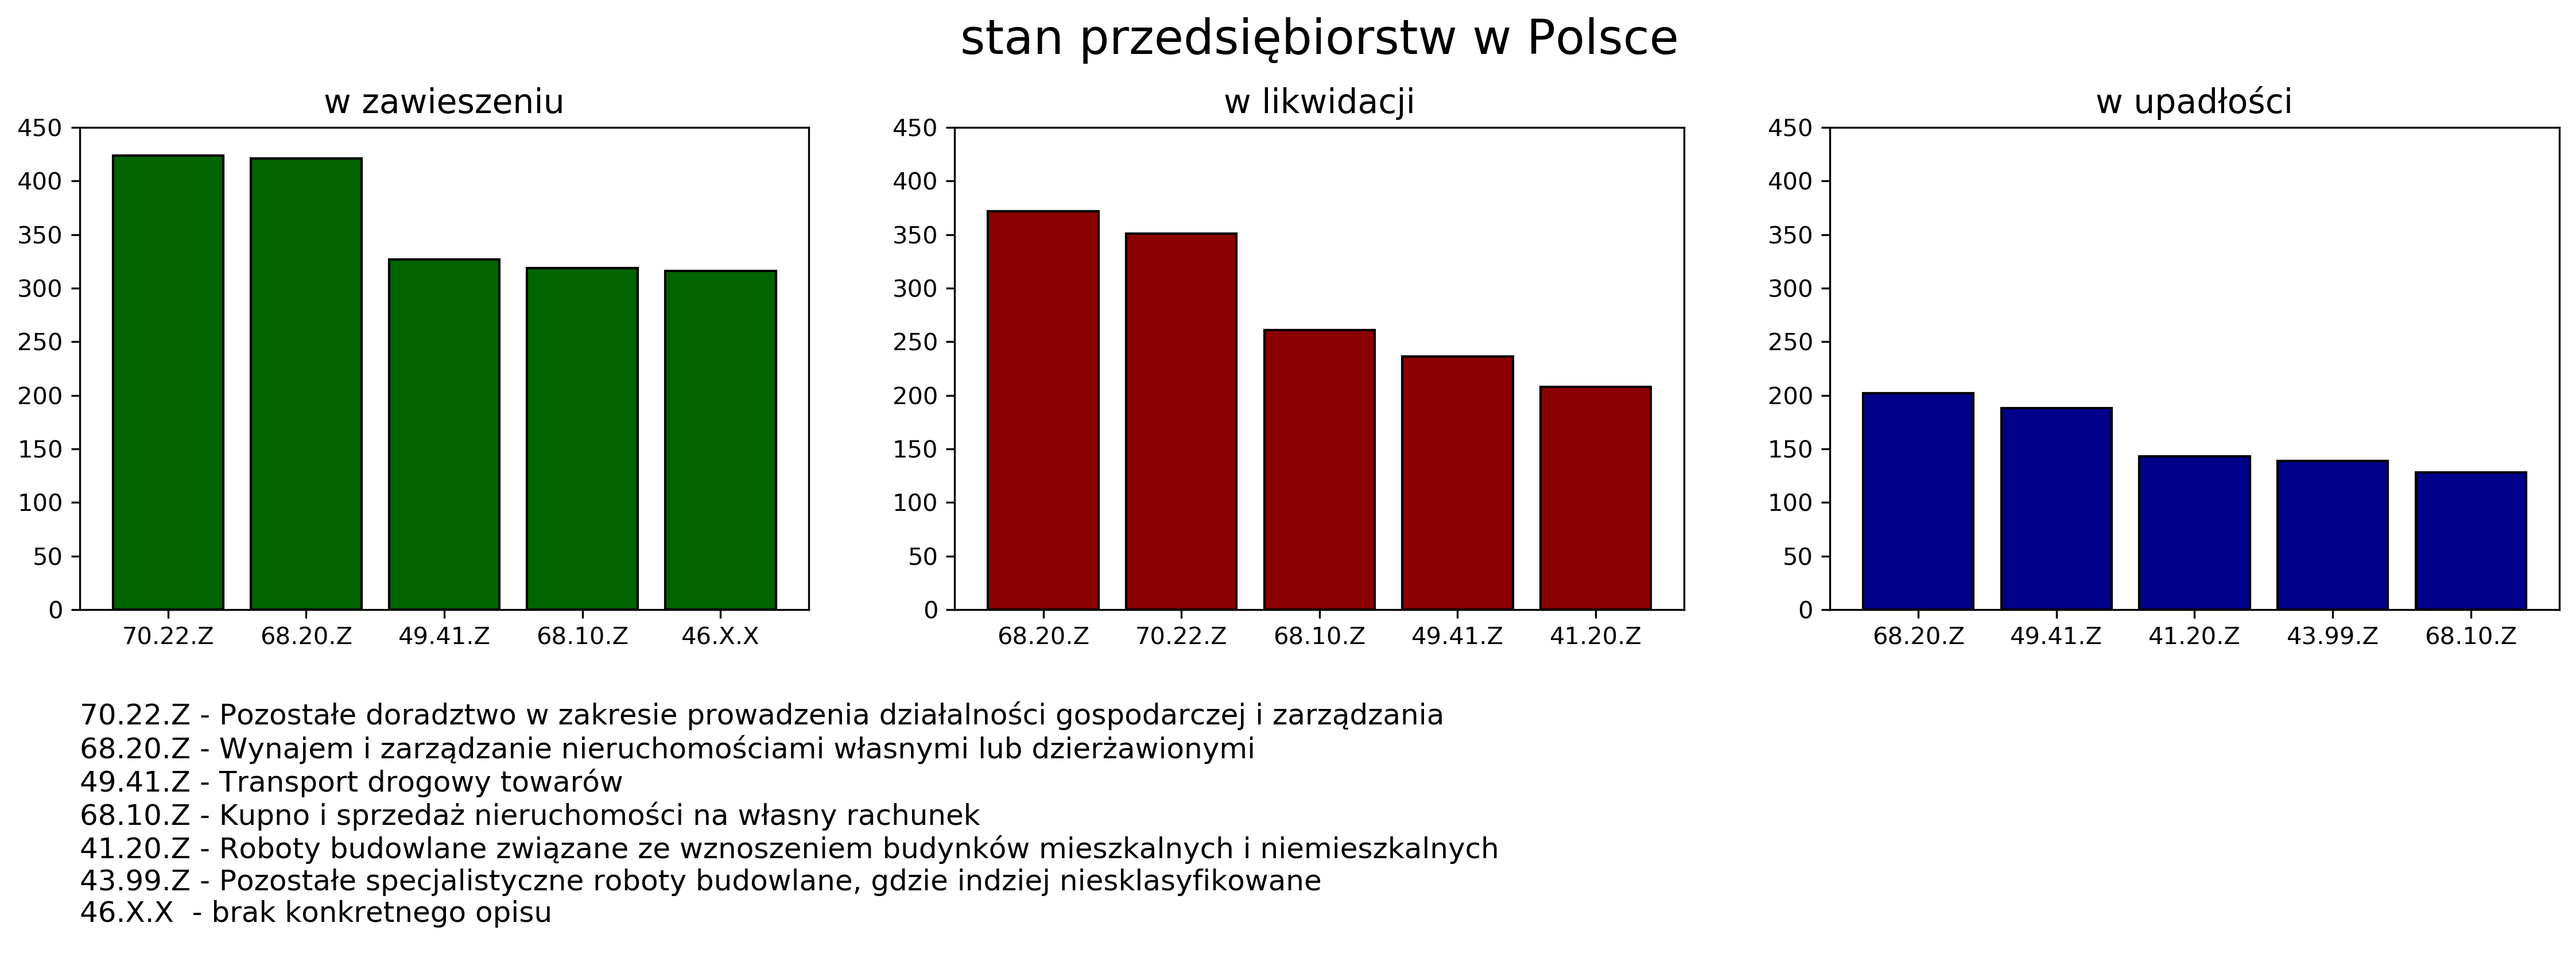

In [45]:
mlp.rcParams['figure.dpi'] = 300
legenda='''
70.22.Z - Pozostałe doradztwo w zakresie prowadzenia działalności gospodarczej i zarządzania
68.20.Z - Wynajem i zarządzanie nieruchomościami własnymi lub dzierżawionymi 
49.41.Z - Transport drogowy towarów
68.10.Z - Kupno i sprzedaż nieruchomości na własny rachunek
41.20.Z - Roboty budowlane związane ze wznoszeniem budynków mieszkalnych i niemieszkalnych
43.99.Z - Pozostałe specjalistyczne roboty budowlane, gdzie indziej niesklasyfikowane
46.X.X  - brak konkretnego opisu
'''

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('stan przedsiębiorstw w Polsce',fontsize=20)
n=450
axes[0].set(ylim=(0,n))
axes[1].set(ylim=(0,n))           
axes[2].set(ylim=(0,n))

axes[0].set_title('w zawieszeniu', fontsize=14)
axes[0].bar(podsumowanie_zaw['kod'][:5],podsumowanie_zaw['liczba'][:5],color='darkgreen',ec='black')
axes[0].set_xticklabels(np.array(np.concatenate(np.array((podsumowanie_zaw['kod'][:4],np.array(['46.X.X']))))))

axes[1].set_title('w likwidacji', fontsize=14)
axes[1].bar(podsumowanie_lik['kod'][:5],podsumowanie_lik['liczba'][:5],color='darkred',ec='black')

axes[2].set_title('w upadłości', fontsize=14)
axes[2].bar(podsumowanie_upa['kod'][:5],podsumowanie_upa['liczba'][:5],color='darkblue',ec='black')

plt.gcf().text(0.1, 0.3, legenda, fontsize=12)
fig.subplots_adjust(wspace=0.2, hspace=0.2,
                    left=0.1, right=0.9,
                    top=0.9,    bottom=0.55)


plt.show()

# fig.savefig("przedsiebiorstwa.jpeg")

## Zapis wyników do excela

In [46]:
writer = pd.ExcelWriter('calosc_summary.xlsx')

In [47]:
podsumowanie_lik.to_excel(writer,sheet_name='w_likwidacji',index=False)
podsumowanie_zaw.to_excel(writer,sheet_name='w_zawieszeniu',index=False)
podsumowanie_upa.to_excel(writer,sheet_name='w_upadlosci',index=False)
writer.save()